# **Estudo de ROC/AUC**

Este notebook é dedicado ao estudo das métricas ROC (Receiver Operating Characteristic) e AUC (Area Under the Curve). Para isso, utilizaremos a base de dados `load_breast_cancer` e o modelo de classificação `LogisticRegression`. 

O objetivo é compreender como essas métricas podem ser aplicadas para avaliar o desempenho de modelos de classificação binária.

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

In [3]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Separante the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
# Criando o medelo de regressão logística
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# Avaliação do modelo
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9766


In [7]:
# Realizando probabilidade das previsões
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [8]:
# Métricas da roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Mostrando os resultados
print("False Positive Rate:", fpr)
print("True Positive Rate:", tpr)
print("Thresholds:", thresholds)

False Positive Rate: [0.         0.         0.         0.01587302 0.01587302 0.03174603
 0.03174603 0.07936508 0.07936508 0.0952381  0.0952381  1.        ]
True Positive Rate: [0.         0.00925926 0.9537037  0.9537037  0.96296296 0.96296296
 0.98148148 0.98148148 0.99074074 0.99074074 1.         1.        ]
Thresholds: [           inf 9.99999940e-01 8.03334391e-01 7.94787516e-01
 7.70424186e-01 6.65542843e-01 5.65631059e-01 2.50235500e-01
 9.22716909e-02 6.88785966e-02 6.68326726e-02 7.01898005e-24]


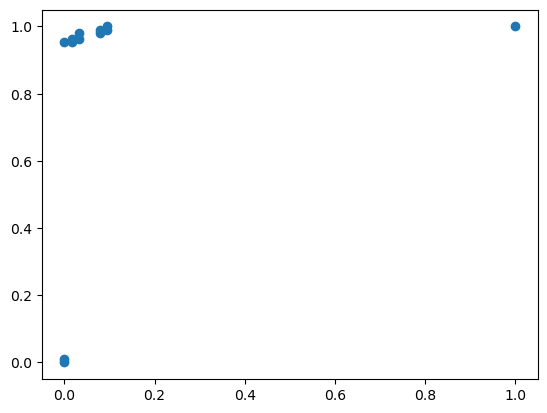

In [9]:
# Plotando os valores
plt.scatter(fpr, tpr)
plt.show()

In [ ]:
# Area sob a curva ROC
area = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {area:.4f}")

AUC: 0.9976


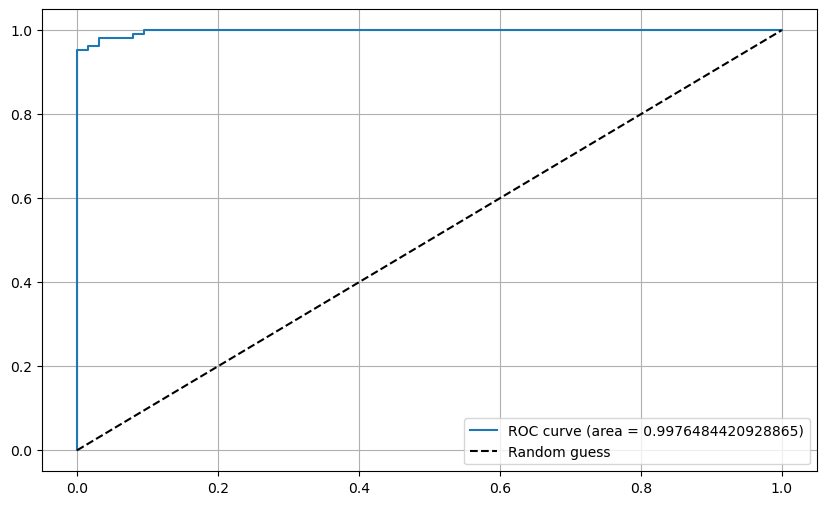

In [11]:
# Plotando a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(area))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.legend(loc='lower right')
plt.grid()
plt.show()